In [3]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\SWMMD\Desktop\Mike\Movies.csv')


In [4]:
# Now let's take a look at the data

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,7/22/2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,5/6/2016,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,7/25/2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,12/2/2016,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [5]:


# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [6]:


# Data Types for our columns

print(df.dtypes)



budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object


<AxesSubplot:>

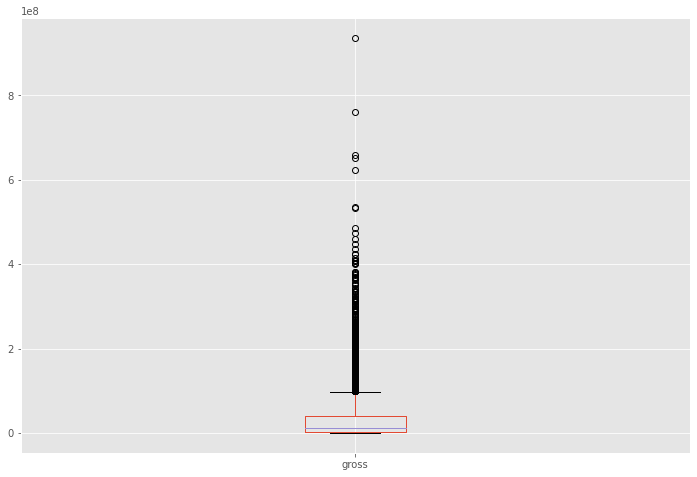

In [7]:
# Are there any Outliers?

df.boxplot(column=['gross'])


In [8]:
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,7/22/2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,5/6/2016,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,7/25/2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,12/2/2016,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [9]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,12/18/2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,12/18/2009,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,12/19/1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,6/12/2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,5/4/2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,4/12/2013,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,3/9/2012,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,1/19/2014,106,5.7,Jemma Dallender,21070,Neil Elman,2013
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,10/1/1997,84,5.7,Will Friedle,5034,Andy Burg,1997


<AxesSubplot:xlabel='gross', ylabel='budget'>

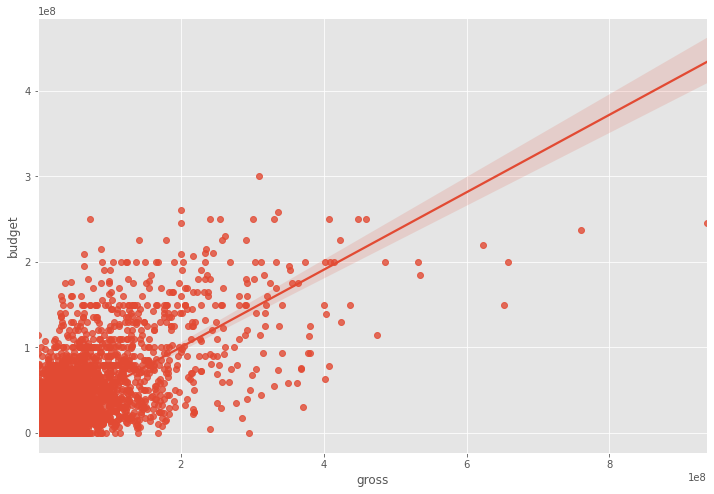

In [10]:


sns.regplot(x="gross", y="budget", data=df)



<AxesSubplot:xlabel='score', ylabel='gross'>

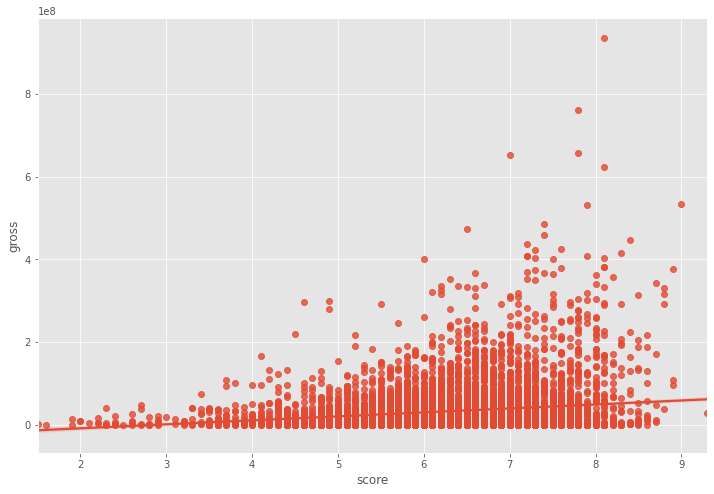

In [11]:
sns.regplot(x="score", y="gross", data=df)


In [12]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [13]:
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [14]:


df.corr(method ='spearman')



,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


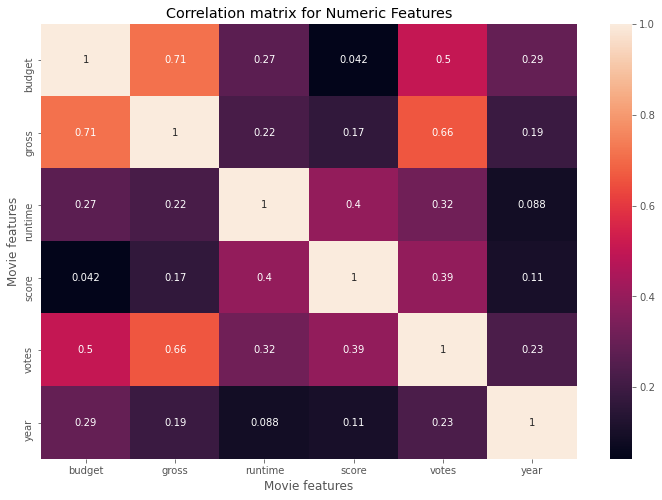

In [15]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [16]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,-0.053390,-0.058972,0.098884,0.009617,0.265780,0.260056,0.033532,0.267866,0.182441,-0.019359,0.082724,0.276622,0.168884,0.274476
company,-0.053390,1.000000,0.207891,0.528937,0.083304,0.595539,0.585783,0.035007,0.590363,-0.017205,-0.028393,0.499675,0.556854,0.525347,0.589459
country,-0.058972,0.207891,1.000000,0.139928,0.026460,0.110702,0.109299,0.170565,0.114623,0.088068,-0.010712,0.153764,0.101652,0.138723,0.107460
director,0.098884,0.528937,0.139928,1.000000,0.050684,0.718102,0.708987,0.059209,0.714279,-0.048564,-0.015889,0.621374,0.692806,0.711480,0.716466
genre,0.009617,0.083304,0.026460,0.050684,1.000000,0.061585,0.064614,0.045332,0.063290,0.068504,-0.044007,0.064794,0.057885,0.054884,0.063244
gross,0.265780,0.595539,0.110702,0.718102,0.061585,1.000000,0.980170,0.015757,0.988701,0.067788,-0.036941,0.696549,0.963910,0.795554,0.997612
name,0.260056,0.585783,0.109299,0.708987,0.064614,0.980170,1.000000,0.016060,0.971935,0.065114,-0.035479,0.686017,0.946291,0.786625,0.980672
rating,0.033532,0.035007,0.170565,0.059209,0.045332,0.015757,0.016060,1.000000,0.018538,0.019492,0.012675,0.083682,0.007277,0.037288,0.012236
released,0.267866,0.590363,0.114623,0.714279,0.063290,0.988701,0.971935,0.018538,1.000000,0.073431,-0.039006,0.692609,0.955360,0.790091,0.989946
runtime,0.182441,-0.017205,0.088068,-0.048564,0.068504,0.067788,0.065114,0.019492,0.073431,1.000000,-0.010943,-0.005030,0.080750,0.016035,0.075231


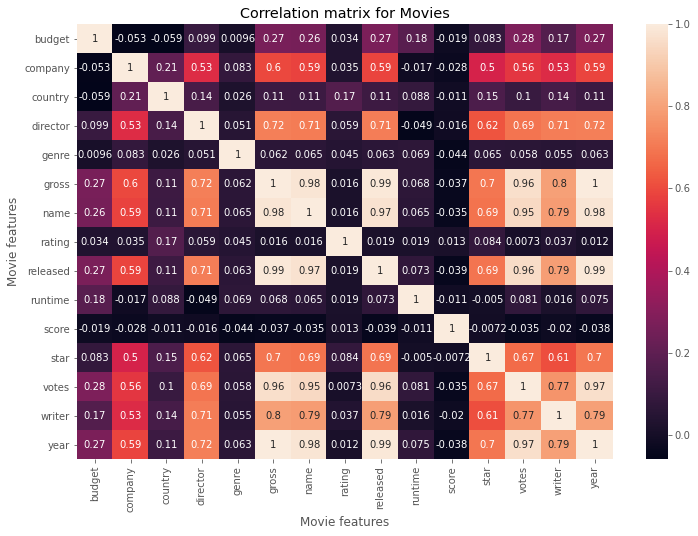

In [17]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [18]:


correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)



budget  budget      1.000000
        company    -0.053390
        country    -0.058972
        director    0.098884
        genre       0.009617
                      ...   
year    score      -0.038200
        star        0.695462
        votes       0.965470
        writer      0.794676
        year        1.000000
Length: 225, dtype: float64


In [19]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget    country    -0.058972
country   budget     -0.058972
budget    company    -0.053390
company   budget     -0.053390
runtime   director   -0.048564
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64


In [20]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   writer      0.525347
writer    company     0.525347
director  company     0.528937
company   director    0.528937
votes     company     0.556854
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 85, dtype: float64


In [21]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

In [22]:


df['Year'] = df['released'].astype(str).str[:4]
df



,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,8/22
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,6/11
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,5/16
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,7/18
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,8/1/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,7/22/2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,7/22
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,5/6/2016,90,4.9,Selma Blair,1959,Paige Cameron,2016,5/6/
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,7/25/2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,7/25
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,12/2/2016,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,12/2


In [23]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,26183197
1+2 Seisaku Iinkai,2000,1136776
101st Street Films,1998,306715
10th Hole Productions,2010,103280
120 Films,2002,753501
...,...,...
Zucker Brothers Productions,1998,6940185
double A Films,2000,1568749
erbp,2013,444098


In [24]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                                 year
Paramount Pictures                      2011    1486604229
Universal Pictures                      2015    1411831667
Warner Bros.                            2008    1327598616
                                        2010    1255477478
                                        2011    1217527619
                                        2005    1175793638
Twentieth Century Fox Film Corporation  2009    1173191407
Warner Bros.                            2006    1154792759
                                        2009    1146640373
Walt Disney Pictures                    2010    1134883375
Columbia Pictures                       2011    1072753462
Universal Pictures                      2013    1066421491
Warner Bros.                            2014    1062468828
Universal Pictures                      2007    1057955786
Columbia Pictures                       2012    1020616938
Name: gross, dtype: int64

In [25]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

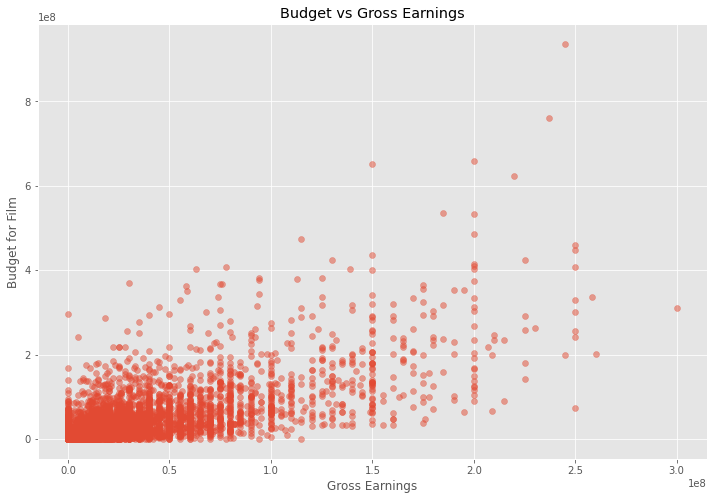

In [26]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [27]:


df



,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,8/22
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,6/11
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,5/16
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,7/18
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,8/1/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,7/22/2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,7/22
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,5/6/2016,90,4.9,Selma Blair,1959,Paige Cameron,2016,5/6/
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,7/25/2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,7/25
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,12/2/2016,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,12/2


In [28]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,8000000,665,54,2192,1,52287414,4661,8,2082,89,8.1,2454,299174,3716,1986,269
1,6000000,1680,54,1296,4,70136369,1821,7,1584,103,7.8,1605,264740,1970,1986,196
2,15000000,1680,54,2645,0,179800601,6203,6,1409,110,6.9,2345,236909,1852,1986,170
3,18500000,2062,54,1066,0,85160248,295,8,1836,137,8.4,2192,540152,1629,1986,233
4,9000000,2122,54,2123,1,18564613,1872,6,1983,90,6.9,1139,36636,2549,1986,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,1876,91,5.4,1066,9161,1800,2016,238
6816,0,1914,54,1989,6,28368,3430,7,1550,90,4.9,2146,1959,3008,2016,190
6817,3500000,2124,54,2313,2,3775000,577,8,1897,76,6.5,1355,36333,450,2016,241
6818,0,415,54,1914,6,25981,5272,8,647,76,6.2,1370,6947,2946,2016,50


In [29]:


df_numerized.corr(method='pearson')



,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.017001,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,0.010428
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.015060,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.013316
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,0.012978,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,0.014785
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,-0.008470,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,-0.006993
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.049804,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.047828
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.022504,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,0.015094
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.000553,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,-0.000528
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.019698,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,0.025390
released,0.017001,0.015060,0.012978,-0.008470,-0.049804,0.022504,0.000553,0.019698,1.000000,-0.081438,-0.052549,0.003557,-0.006113,0.005208,0.016916,0.991290
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,-0.081438,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,-0.086452


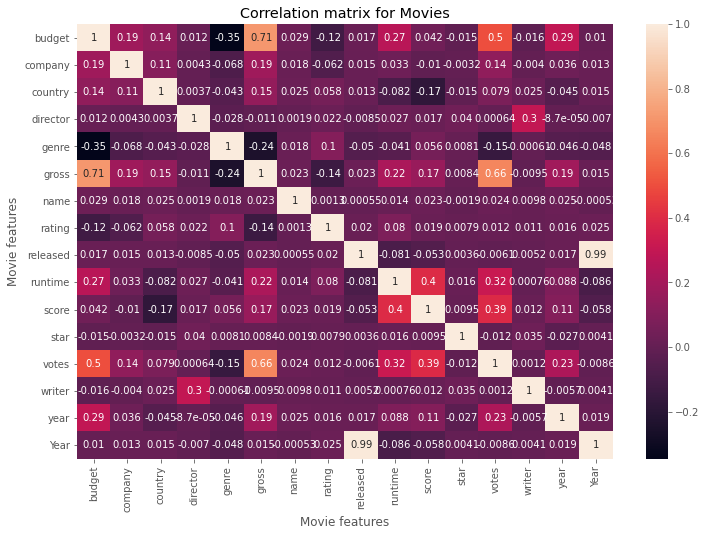

In [30]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
#Company has low correlation